In [71]:
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastcore.all import *
from fastai import *
from time import sleep


In [36]:
def search_images(term, max_images = 30 ):
    print(f'Searching for {term}')
    return L(ddg_images(term, max_results= max_images)).itemgot('image')

In [60]:
urls = search_images('dump truck',2)
len(urls)

Searching for dump truck


2

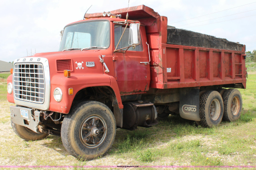

In [61]:
dest= 'htv.jpg'
download_url(urls[0],dest=dest)
im = Image.open(dest)
im.to_thumb(256,256)

In [15]:
# searchs = 'ltv','htv'
# path = Path('htv_or_not')

# for o in searchs:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest = dest , urls= search_images(f'{o} vehicle photo',300) )
#     sleep(10)
#     resize_images(path/o, max_size= 400, dest= path/o)

In [19]:
path = Path('dataset')

In [20]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

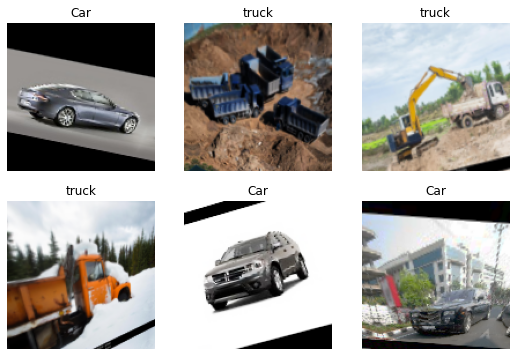

In [28]:
dls = DataBlock(blocks=[ImageBlock, CategoryBlock], 
               get_items=get_image_files,
               splitter= RandomSplitter(seed= 42),
               get_y=parent_label, item_tfms= [Resize(128,method='squish')],
               batch_tfms = aug_transforms(mult =2)
               ).dataloaders(path,bs=32)
dls.show_batch(max_n= 6)

In [87]:
learn = vision_learner(dls, resnet18, metrics= error_rate)

/home/ikram/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ikram/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [88]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.305173,0.079564,0.017134,02:50


epoch,train_loss,valid_loss,error_rate,time
0,0.095423,0.026131,0.004673,04:38
1,0.049345,0.001335,0.001558,04:50
2,0.020178,0.006871,0.003115,05:11


In [78]:
pred, pred_idx, probs = learn.predict(PILImage.create('ltv.jpg'))
print(f'this is a {is_htv}')
print(f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}')

this is a truck
Prediction: Car; Probability: 0.9997


In [85]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

In [86]:
# interp.plot_top_losses(40,nrows=10,figsize=(17,20))

In [89]:
cleaner = ImageClassifierCleaner(learn)
cleaner

NameError: name 'ImageClassifierCleaner' is not defined

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),path/cat)

In [76]:
learn.export()